In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline

In [2]:
I = cv2.imread("mandril.jpg")
# cv2.imshow("Mandril", I)  # display
# cv2.waitKey(0)  # wait for key
# cv2.destroyAllWindows()  # close all windows

In [3]:
cv2.imwrite("m.png", I)  # zapis obrazu do pliku

True

In [4]:
print(I.shape)  # dimensions / rows , columns , depth /
print(I.size)  # number of bytes
print(I.dtype)  # data type

(512, 512, 3)
786432
uint8


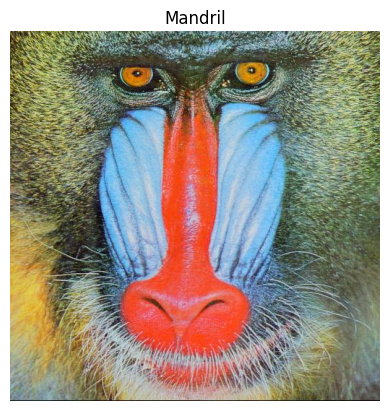

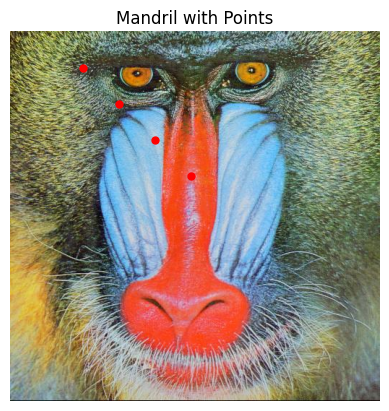

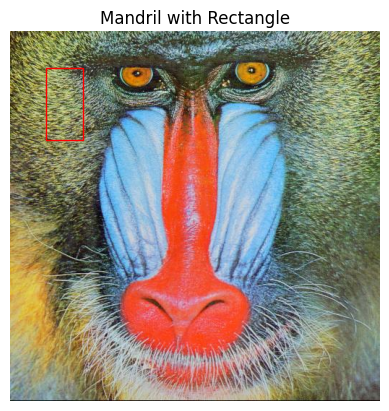

In [5]:
# Load the image
I = plt.imread('mandril.jpg')

# Display the image
plt.figure(1)  # Create figure
plt.imshow(I)  # Add image
plt.title('Mandril')  # Add title
plt.axis('off')  # Disable coordinate display
plt.show()  # Display

# Save the image in PNG format
plt.imsave('mandril.png', I)

# Display the image with points
x = [100, 150, 200, 250]
y = [50, 100, 150, 200]
plt.figure(2)
plt.imshow(I)
plt.plot(x, y, 'r.', markersize=10)  # Red points
plt.title('Mandril with Points')
plt.axis('off')
plt.show()

# Display the image with a rectangle
fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(I)  # Show image
rect = Rectangle((50, 50), 50, 100, fill=False, ec='r')  # Create rectangle
ax.add_patch(rect)  # Add rectangle to plot
plt.title('Mandril with Rectangle')
plt.axis('off')
plt.show()

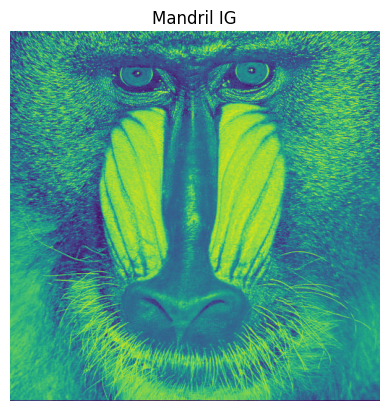

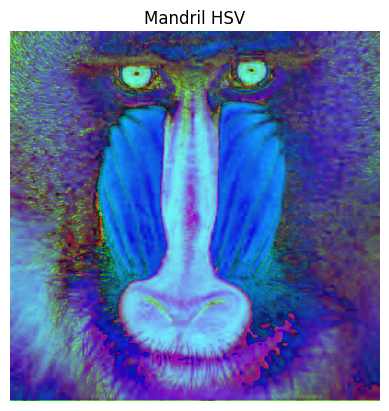

In [6]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(IG)  # Show image
plt.title("Mandril IG")
plt.axis("off")
plt.show()

fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(IHSV)  # Show image
plt.title("Mandril HSV")
plt.axis("off")
plt.show()

(896, 896, 3)


(np.float64(-0.5), np.float64(895.5), np.float64(895.5), np.float64(-0.5))

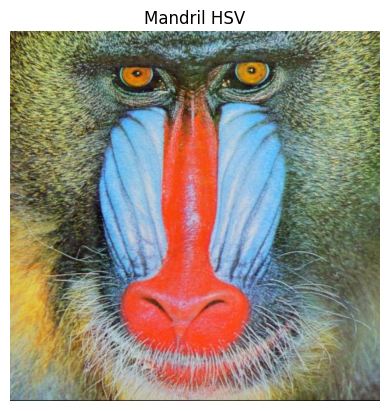

In [7]:
height, width = I.shape[:2]  # retrieving elements 1 and 2 , i . e . the corresponding
height and width
scale = 1.75  # scale factor
Ix2 = cv2.resize(I, (int(scale * height), int(scale * width)))
print(Ix2.shape)

fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(Ix2)  # Show image
plt.title("Mandril HSV")
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

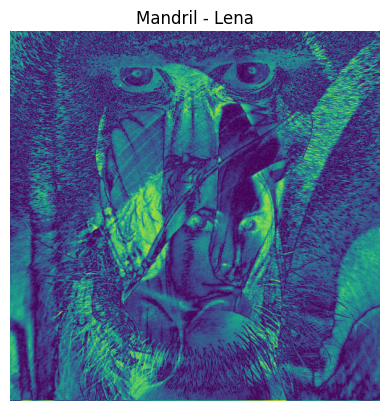

In [8]:
Lena = cv2.imread("lena.png")
LenaG = cv2.cvtColor(Lena, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(cv2.absdiff(IG, LenaG))  # Show image
plt.title("Mandril - Lena")
plt.axis("off")

In [9]:
def hist(img):
    h = np.zeros((256, 1), np.float32)  # Creates and zeros single-column array
    height, width = img.shape[:2]  # Extract height and width
    
    for y in range(height):
        for x in range(width):
            pixel_value = img[y, x]  # Get pixel value
            h[pixel_value] += 1  # Increment corresponding bin
    
    return h

Text(0.5, 1.0, 'MandrilG hist')

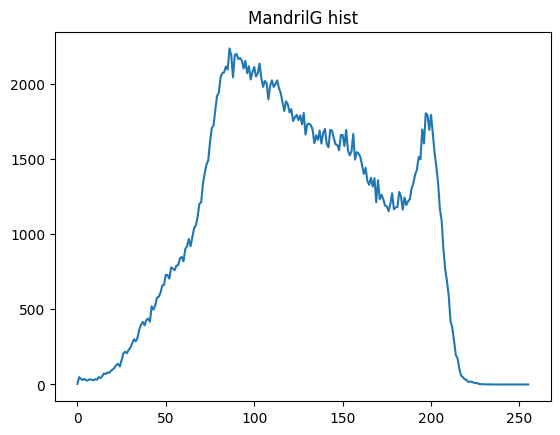

In [10]:
hist = cv2 . calcHist ([ IG ] ,[0] , None ,[256] ,[0 ,256])
# [ IG ] -- input image
# [0] -- for greyscale images there is only one channel
# None -- mask ( you can count the histogram of a selected part of the image )
# [256] -- number of histogram bins
# [0 256 ] -- the range over which the histogram is calculated

fig, ax = plt.subplots(1)  # Create figure and axes
ax.plot(hist)  # Show image
plt.title("MandrilG hist")

Text(0.5, 1.0, 'MandrilG hist')

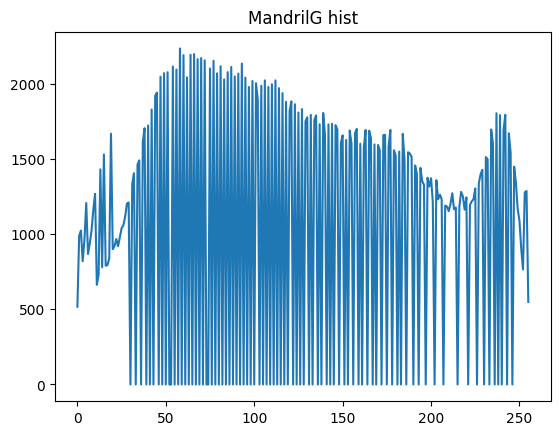

In [11]:
IGE = cv2.equalizeHist(IG)

hist_e = cv2.calcHist([IGE], [0], None, [256], [0, 256])
# [ IG ] -- input image
# [0] -- for greyscale images there is only one channel
# None -- mask ( you can count the histogram of a selected part of the image )
# [256] -- number of histogram bins
# [0 256 ] -- the range over which the histogram is calculated

fig, ax = plt.subplots(1)  # Create figure and axes
ax.plot(hist_e)  # Show image
plt.title("MandrilG hist")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

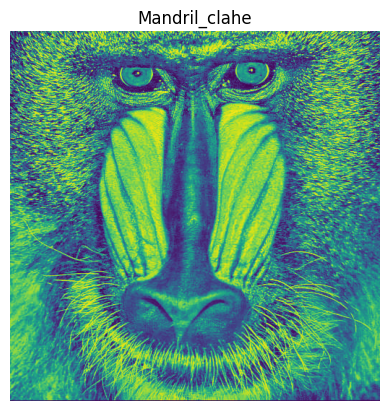

In [12]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# clipLimit - maximum height of the histogram bar - values above are distributed among neighbours
# tileGridSize - size of a single image block ( local method , operates on separate image blocks )
I_CLAHE = clahe.apply(IG)

fig, ax = plt.subplots(1)  # Create figure and axes
ax.imshow(I_CLAHE)  # Show image
plt.title("Mandril_clahe")
plt.axis("off")

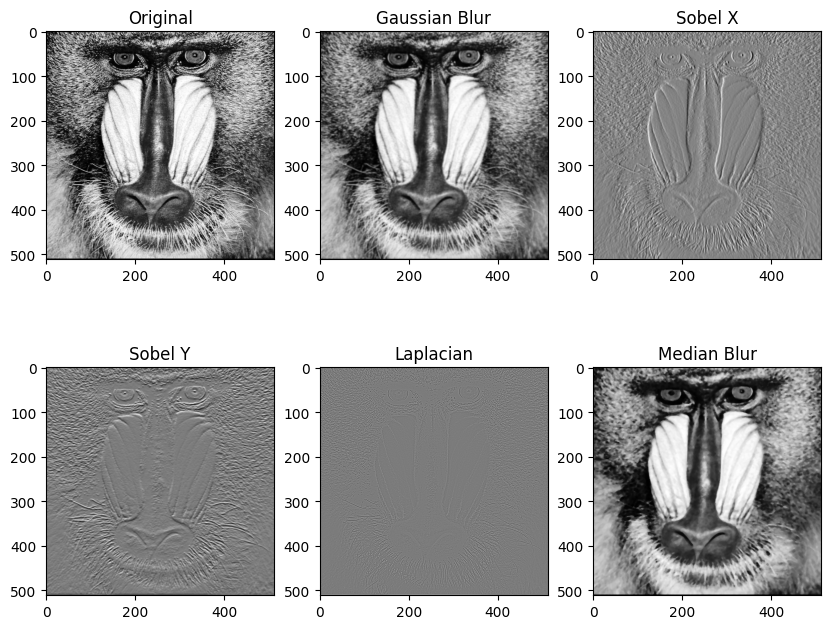

In [13]:
# Apply filters
gaussian = cv2.GaussianBlur(IGE, (5, 5), 0)
sobelx = cv2.Sobel(IGE, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(IGE, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(IGE, cv2.CV_64F)
median = cv2.medianBlur(IGE, 5)

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(IGE, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(gaussian, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(233), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(234), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(235), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(236), plt.imshow(median, cmap='gray'), plt.title('Median Blur')

plt.show()